In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anthony_wrangle

# Prepare

In [2]:
from anthony_wrangle import wrangle_credit
train, validate, test = wrangle_credit()
train

,id,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_housing_type,days_birth,days_employed,...,occupation_type_managers,occupation_type_medicine_staff,occupation_type_other,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waiters/barmen_staff,score
32073,5135805,0,1,0,90000.0,Commercial associate,Secondary / secondary special,House / apartment,19482,2878,...,0,0,0,0,0,0,0,0,0,-40.0
31598,5132791,0,1,2,180000.0,Working,Secondary / secondary special,House / apartment,13361,6586,...,0,0,0,0,0,0,0,0,0,14.0
24158,5096773,0,0,0,171000.0,Pensioner,Secondary / secondary special,House / apartment,21700,13879,...,0,0,1,0,0,0,0,0,0,74.0
34581,5146247,0,1,0,238500.0,Pensioner,Secondary / secondary special,House / apartment,23171,13879,...,0,0,1,0,0,0,0,0,0,93.0
16771,5067027,0,1,1,135000.0,Working,Secondary / secondary special,House / apartment,13589,1649,...,0,0,0,0,0,0,0,0,1,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,5024309,0,1,1,90000.0,Commercial associate,Secondary / secondary special,House / apartment,12890,5359,...,0,0,0,0,0,0,0,0,0,18.0
29856,5118398,0,0,0,292500.0,State servant,Secondary / secondary special,House / apartment,11365,2745,...,0,0,0,0,0,0,0,0,0,19.0
10997,5046256,0,1,0,112500.0,Pensioner,Secondary / secondary special,House / apartment,20843,13879,...,0,0,1,0,0,0,0,0,0,40.0
36434,5145817,0,1,0,90000.0,Pensioner,Secondary / secondary special,House / apartment,22011,13879,...,0,0,1,0,0,0,0,0,0,-9.0


# Exploration
- Segregating by group member until we decide what to incorporate

**Ethics considerations**

In [3]:
train.head()

,id,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_housing_type,days_birth,days_employed,...,occupation_type_managers,occupation_type_medicine_staff,occupation_type_other,occupation_type_private_service_staff,occupation_type_realty_agents,occupation_type_sales_staff,occupation_type_secretaries,occupation_type_security_staff,occupation_type_waiters/barmen_staff,score
32073,5135805,0,1,0,90000.0,Commercial associate,Secondary / secondary special,House / apartment,19482,2878,...,0,0,0,0,0,0,0,0,0,-40.0
31598,5132791,0,1,2,180000.0,Working,Secondary / secondary special,House / apartment,13361,6586,...,0,0,0,0,0,0,0,0,0,14.0
24158,5096773,0,0,0,171000.0,Pensioner,Secondary / secondary special,House / apartment,21700,13879,...,0,0,1,0,0,0,0,0,0,74.0
34581,5146247,0,1,0,238500.0,Pensioner,Secondary / secondary special,House / apartment,23171,13879,...,0,0,1,0,0,0,0,0,0,93.0
16771,5067027,0,1,1,135000.0,Working,Secondary / secondary special,House / apartment,13589,1649,...,0,0,0,0,0,0,0,0,1,38.0


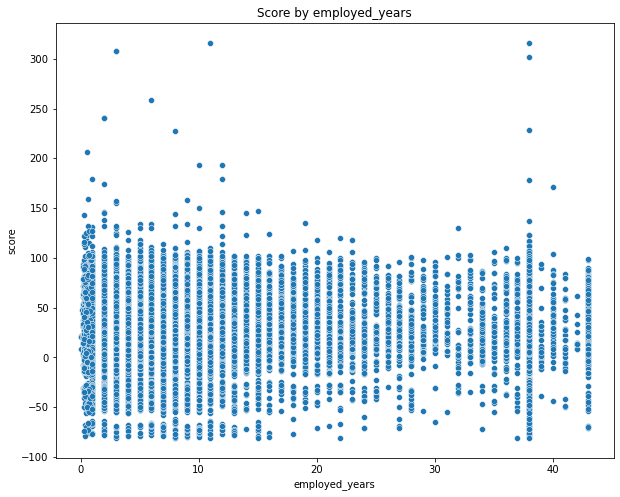

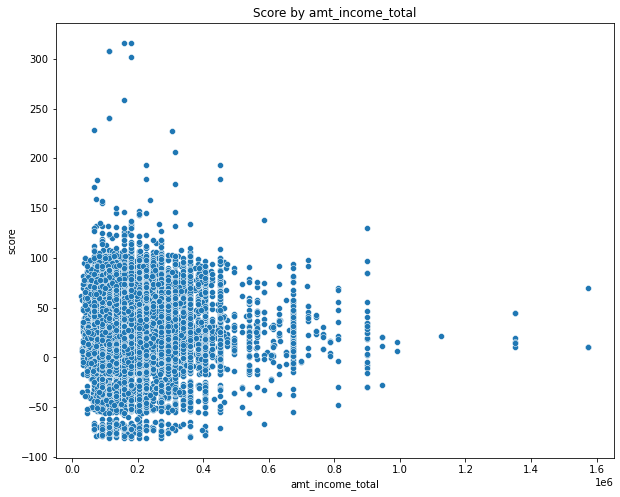

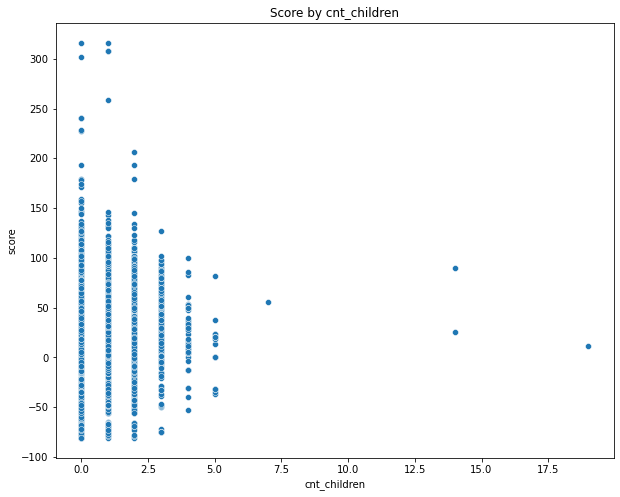

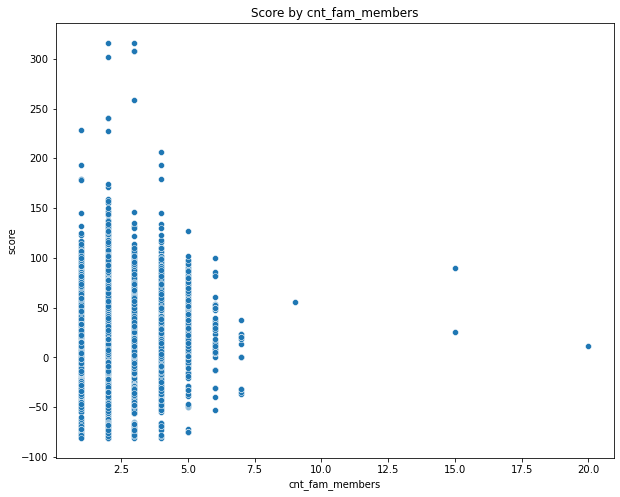

In [4]:
columns = ['employed_years', 'amt_income_total', 'cnt_children', 'cnt_fam_members']
for col in columns:
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=train, x=col, y='score')
    plt.title(f'Score by {col}')

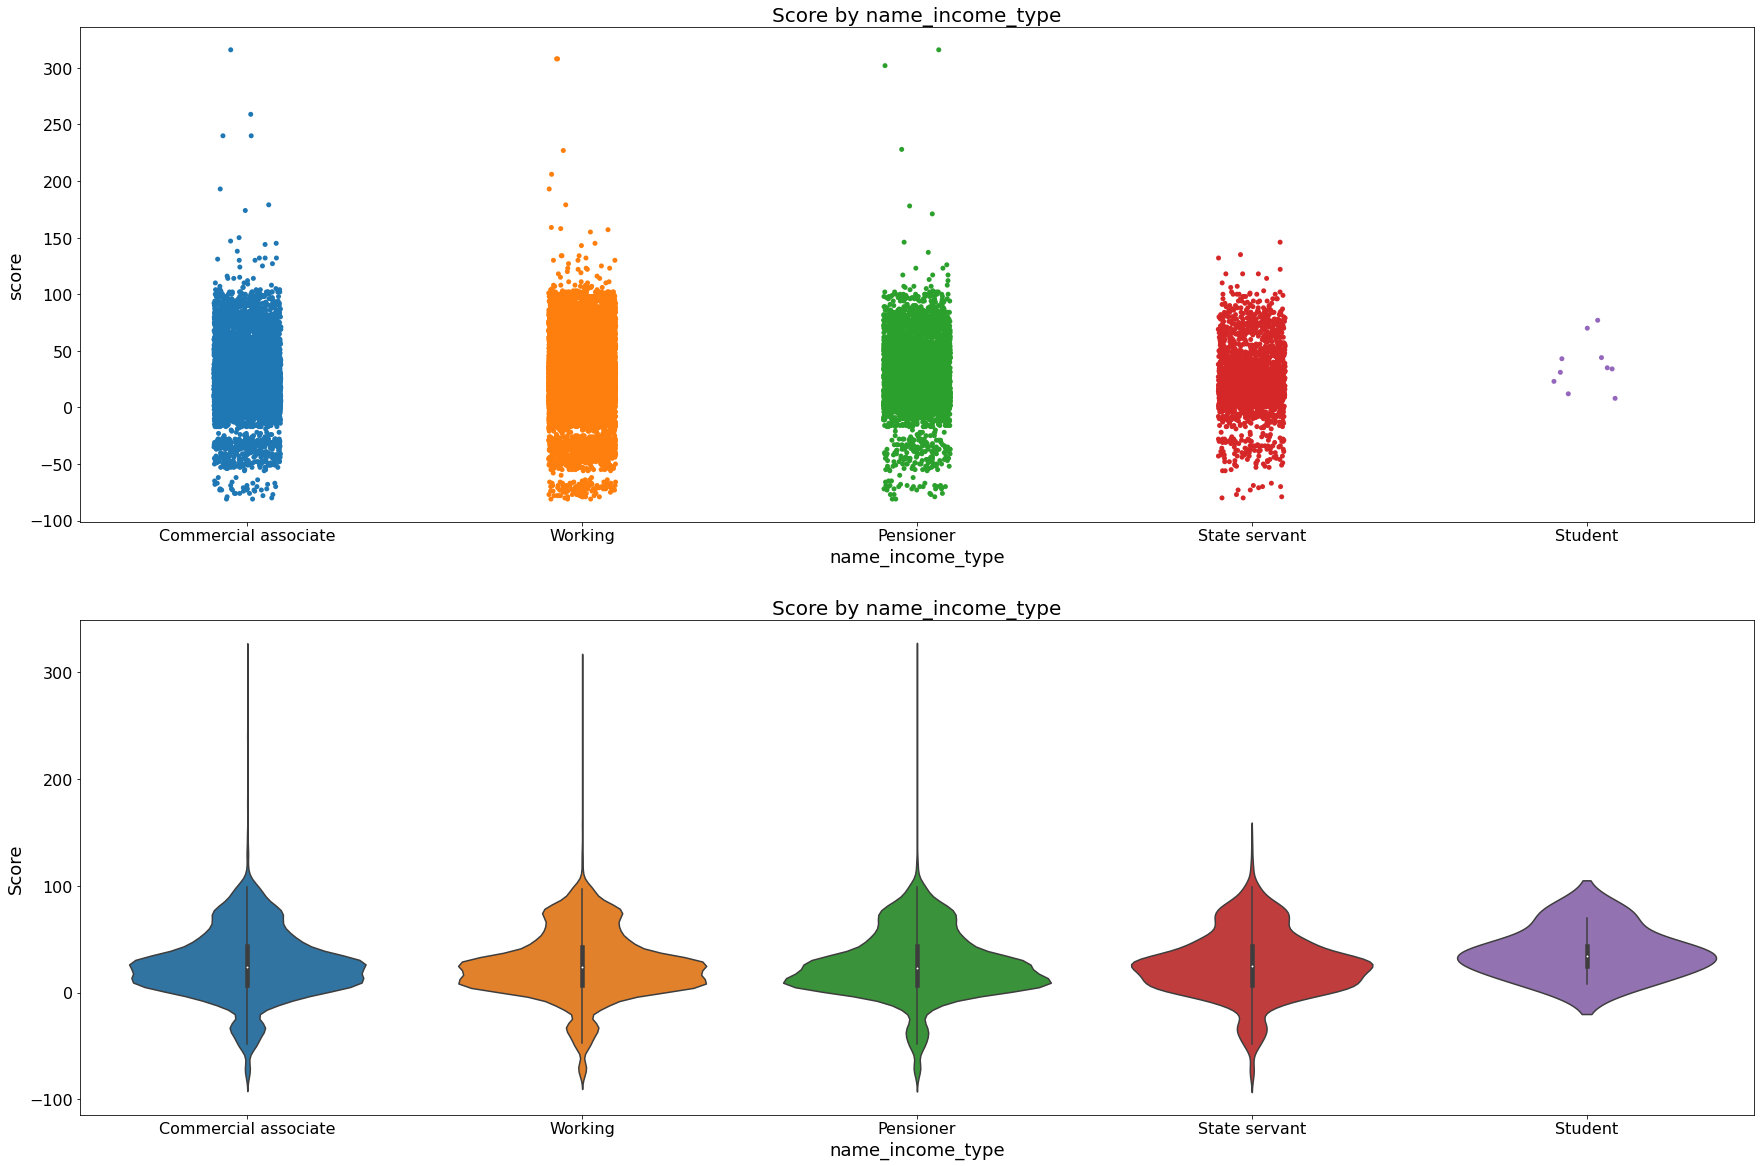

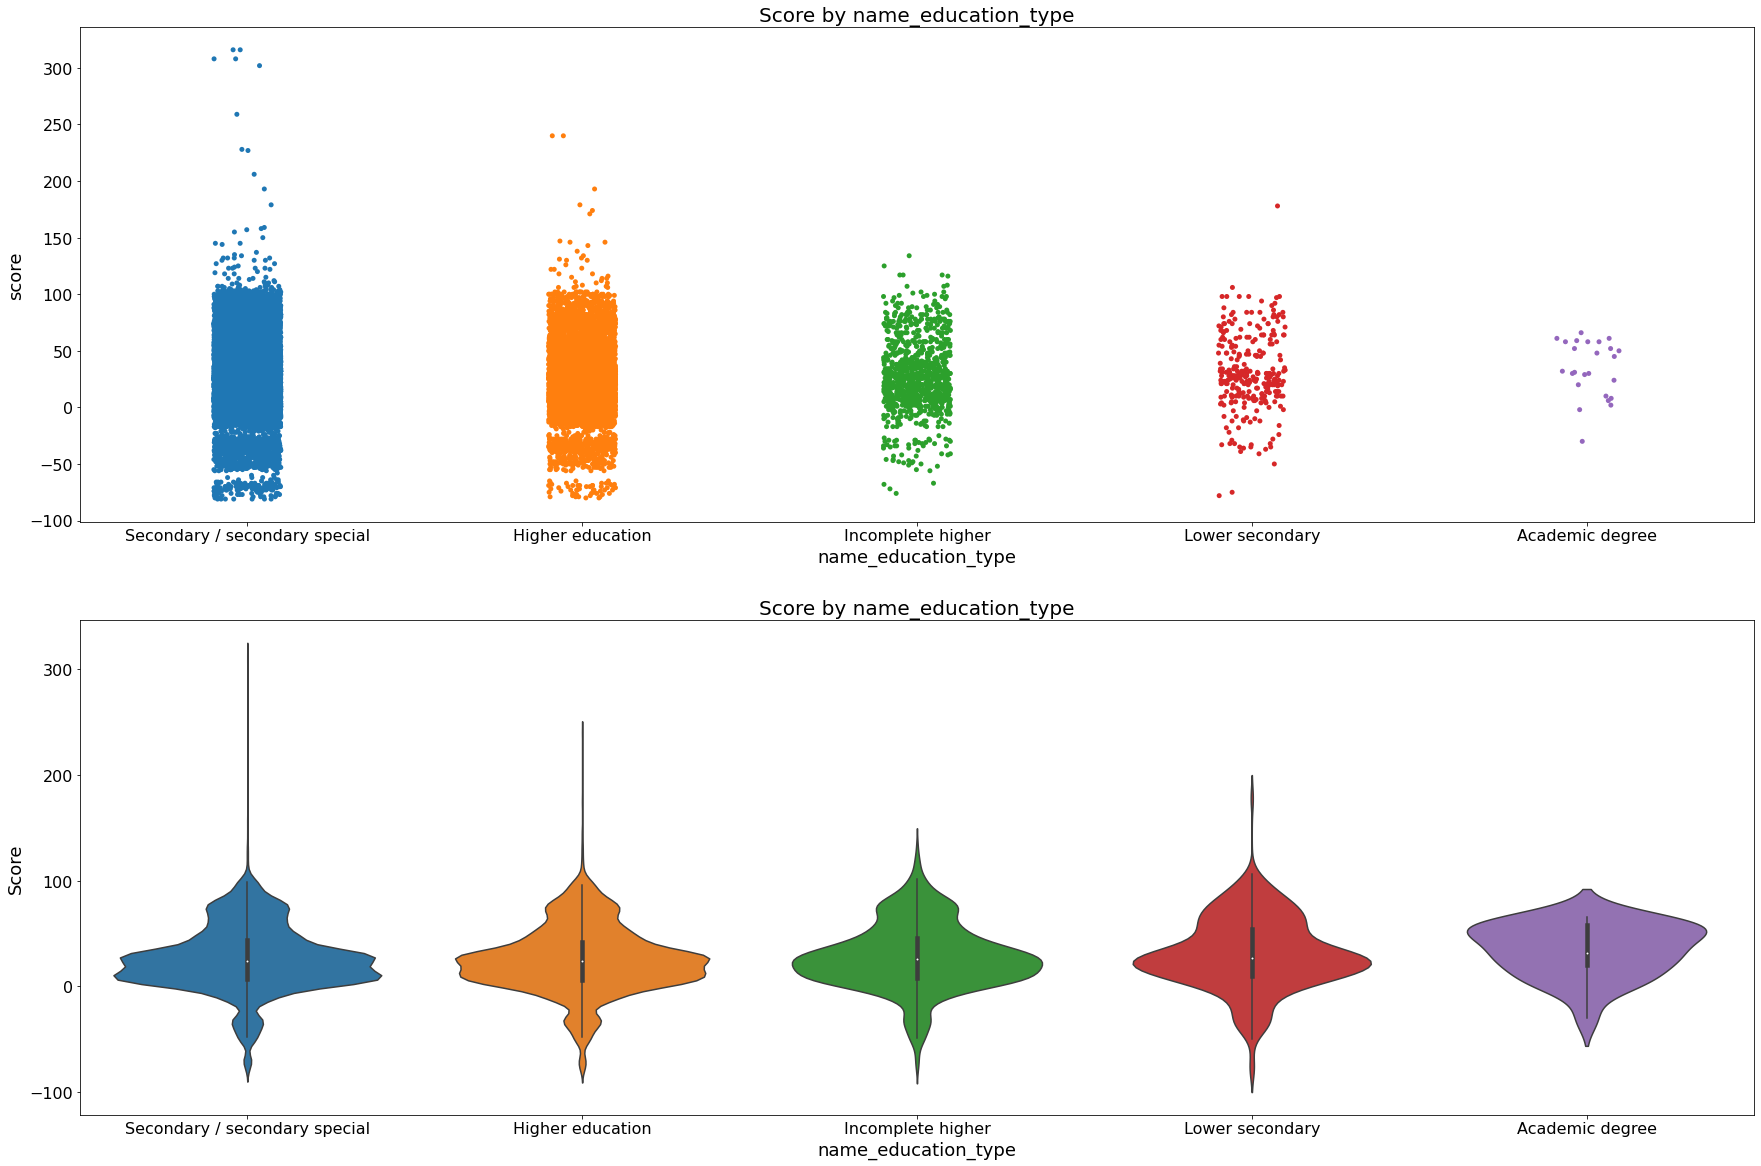

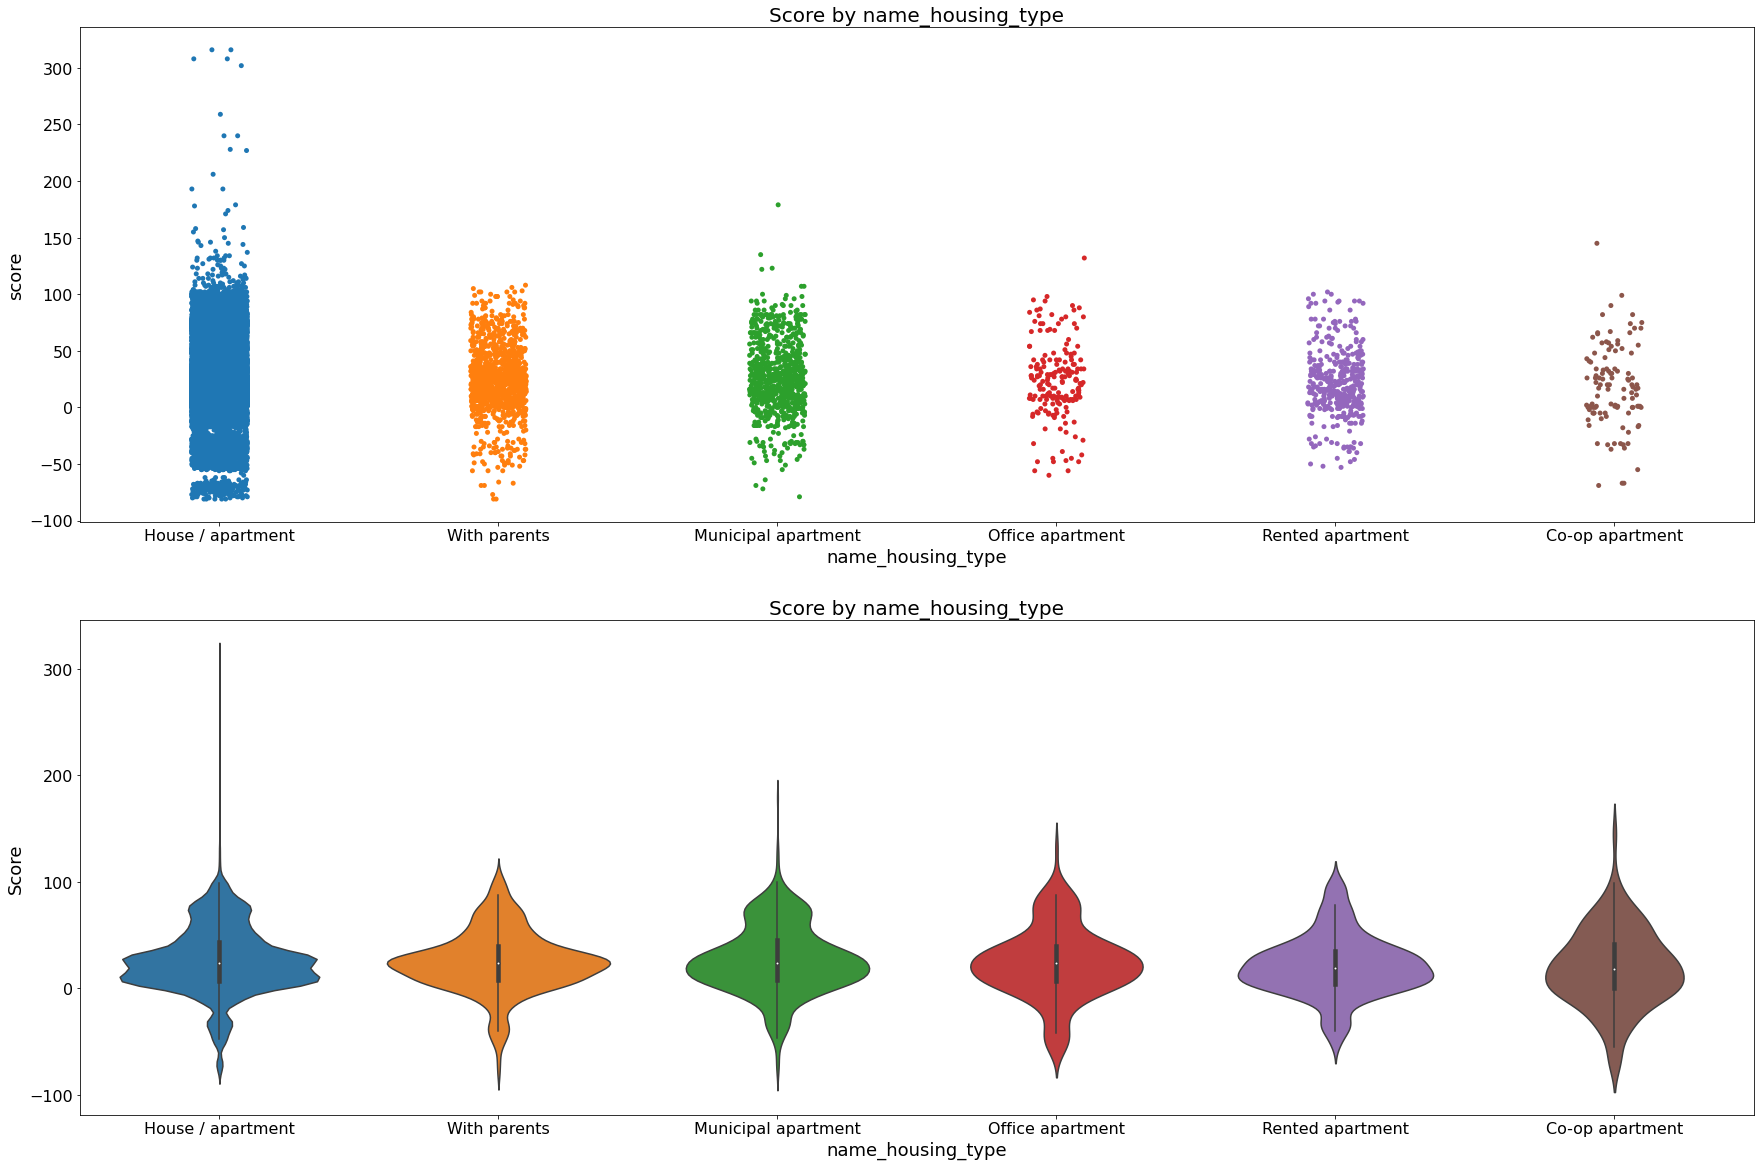

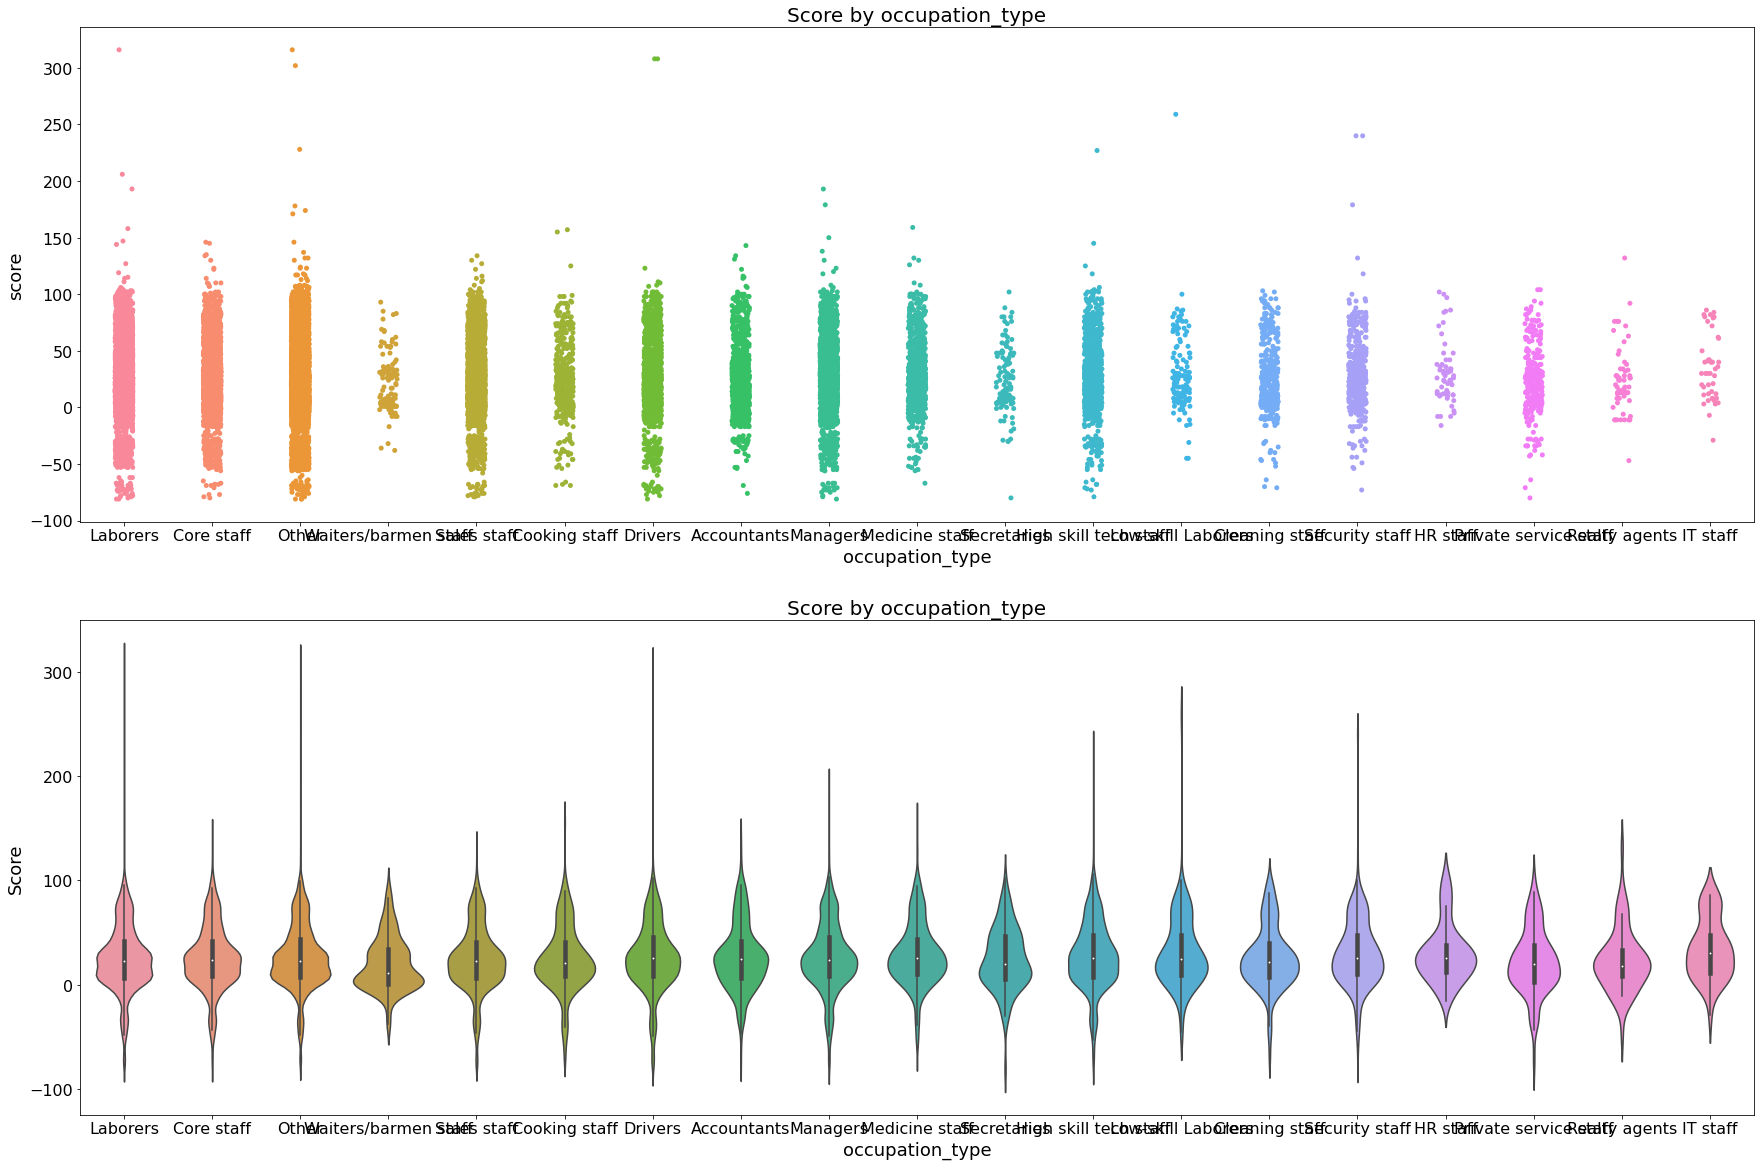

In [5]:
# Plot striplot (swarm plot wouldn't work) and violin plot pairs for all catagory varaibles with more than two possible values
columns = ['name_income_type', 'name_education_type', 'name_housing_type', 'occupation_type']
for col in columns:
    plt.figure(figsize=(30,20))
    plt.subplot(211)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(col, fontsize=18)
    plt.ylabel('Score', fontsize=18)
    plt.title(f'Score by {col}', fontsize=20)
    sns.stripplot(data=train, x=col, y='score')
    plt.subplot(212)
    sns.violinplot(data=train, x=col, y='score')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(col, fontsize=18)
    plt.ylabel('Score', fontsize=18)
    plt.title(f'Score by {col}', fontsize=20)

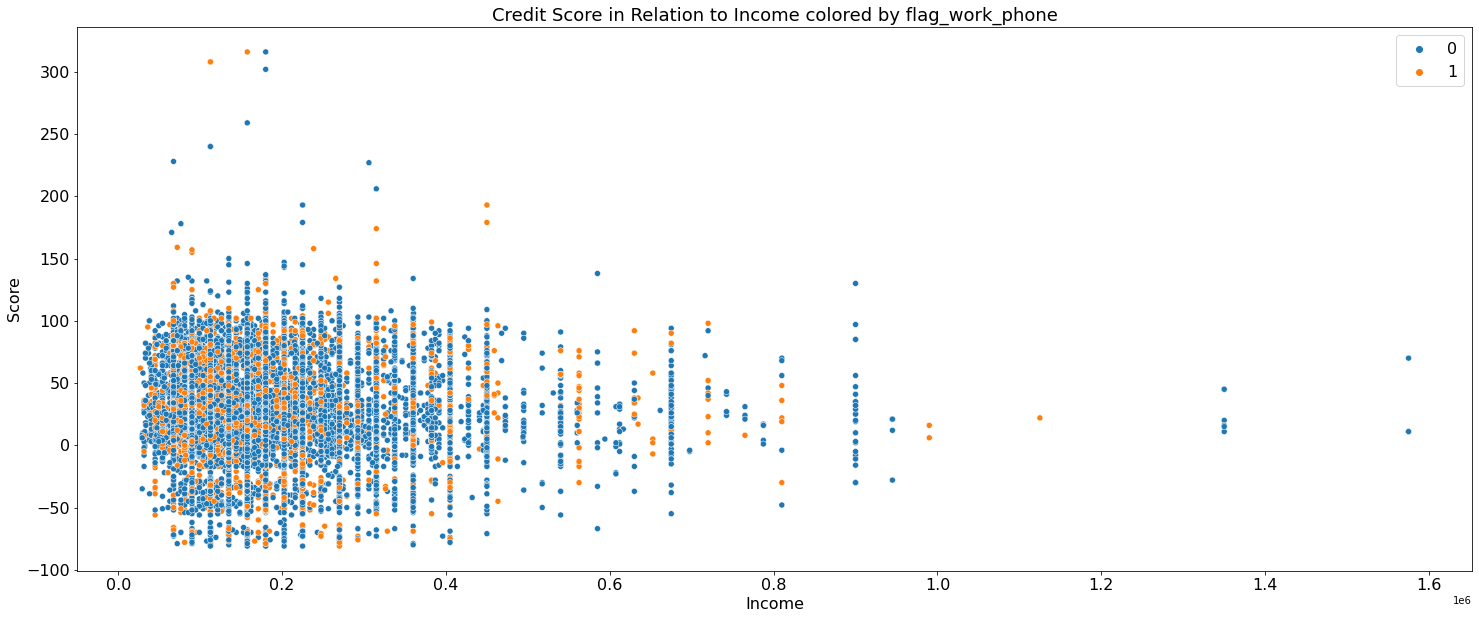

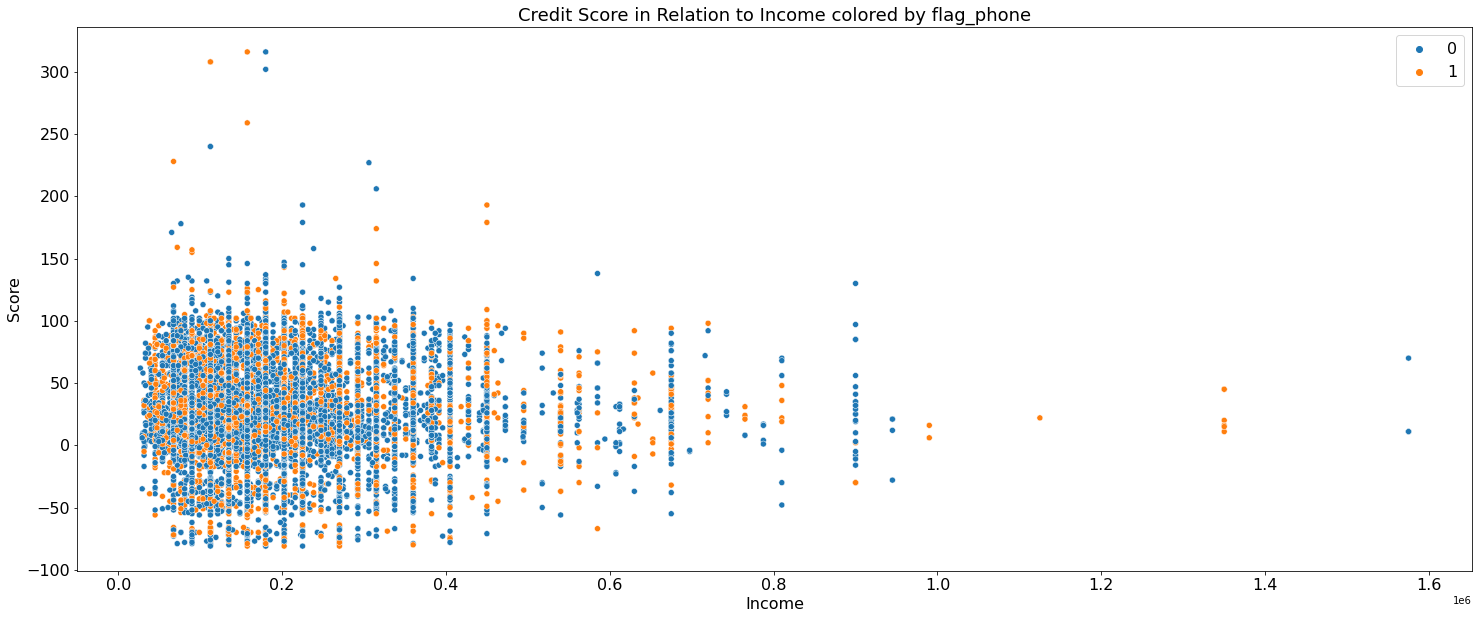

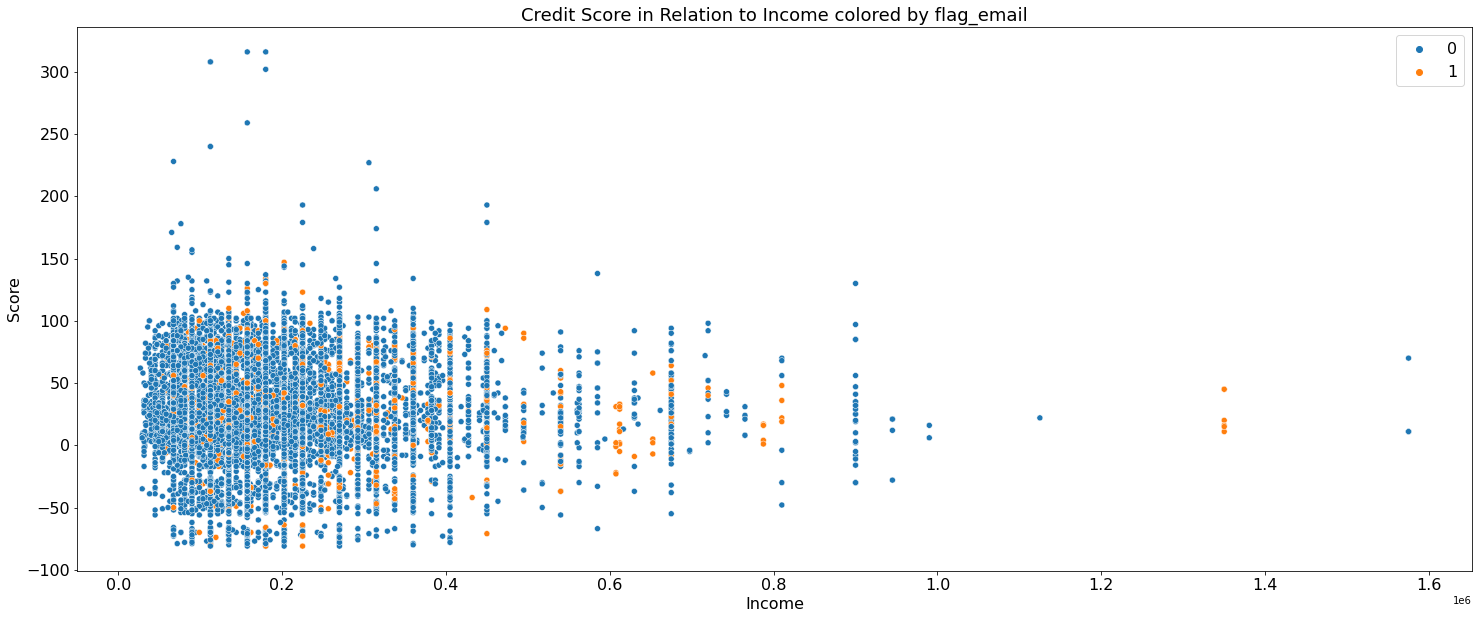

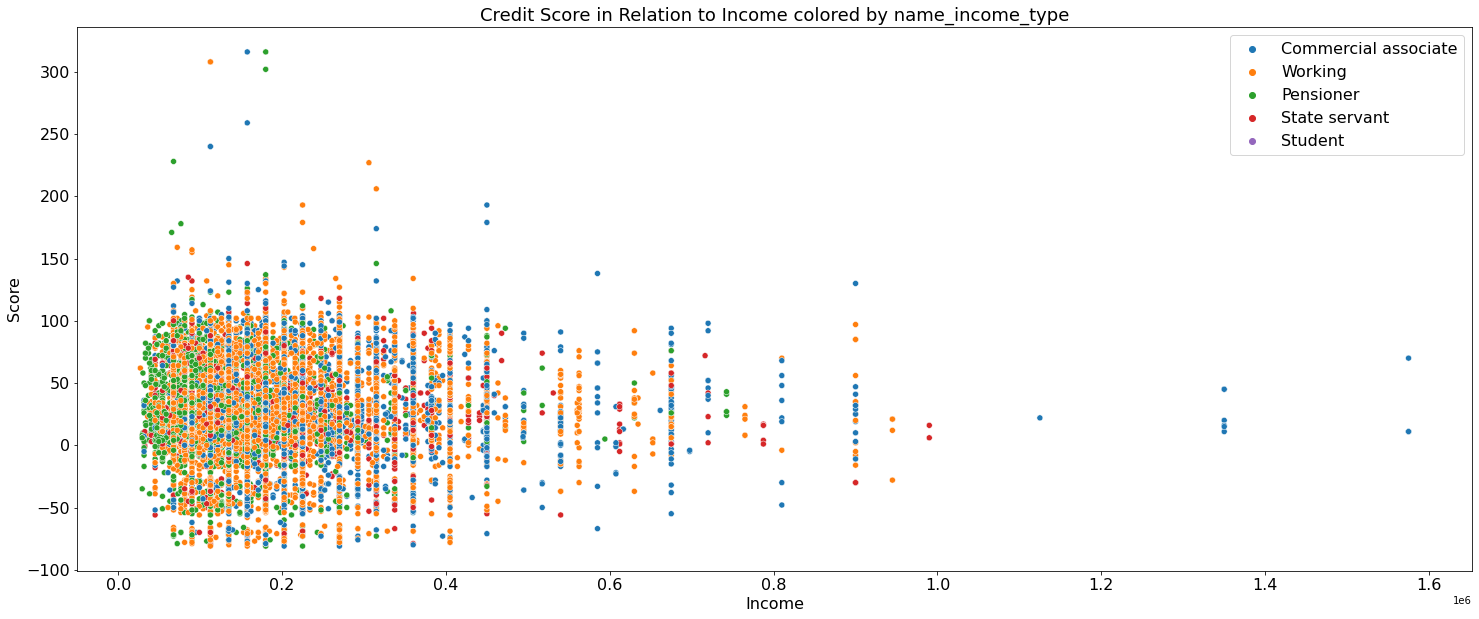

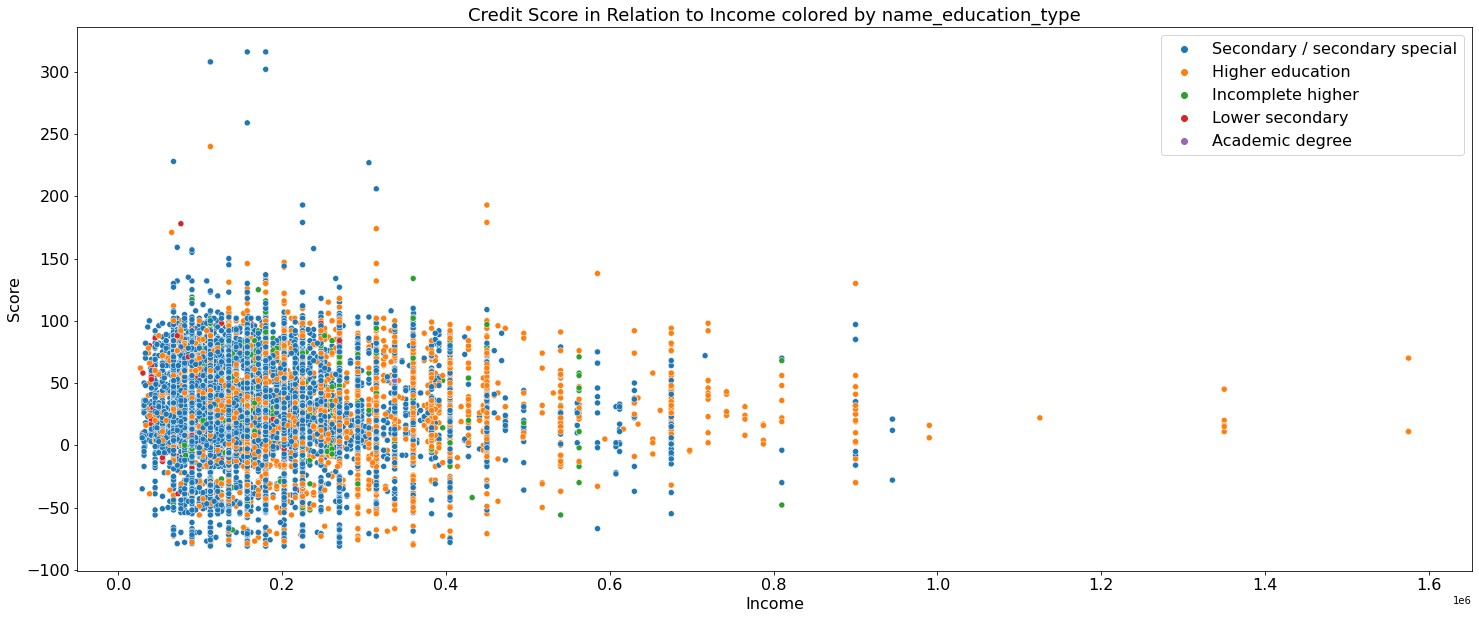

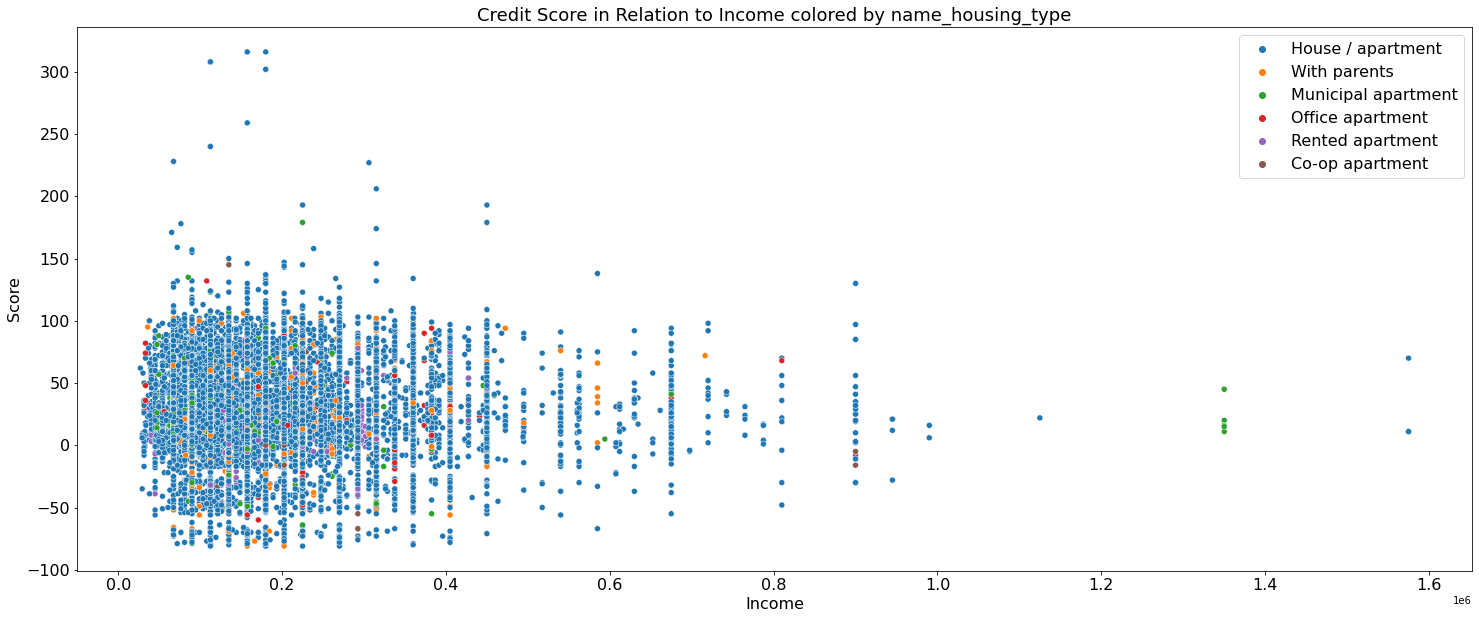

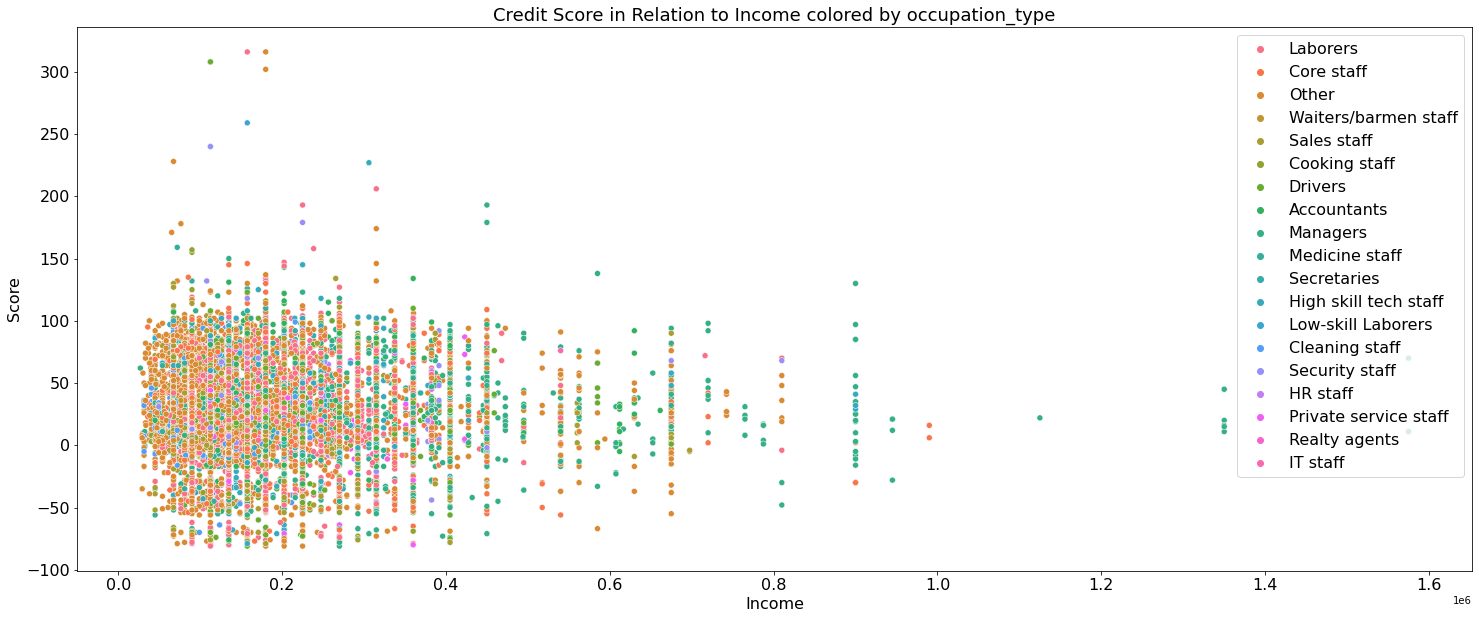

In [6]:
# Hue by catagorical varaibles

columns = ['flag_work_phone', 'flag_phone', 'flag_email', 'name_income_type', 'name_education_type', 'name_housing_type', 'occupation_type']
for col in columns:
    plt.figure(figsize=(25,10))
    sns.scatterplot(data=train, x='amt_income_total', y='score', hue=col)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Income", fontsize=16)
    plt.ylabel("Score", fontsize=16)
    plt.title(f"Credit Score in Relation to Income colored by {col}", fontsize=18)
    plt.legend(fontsize=16)

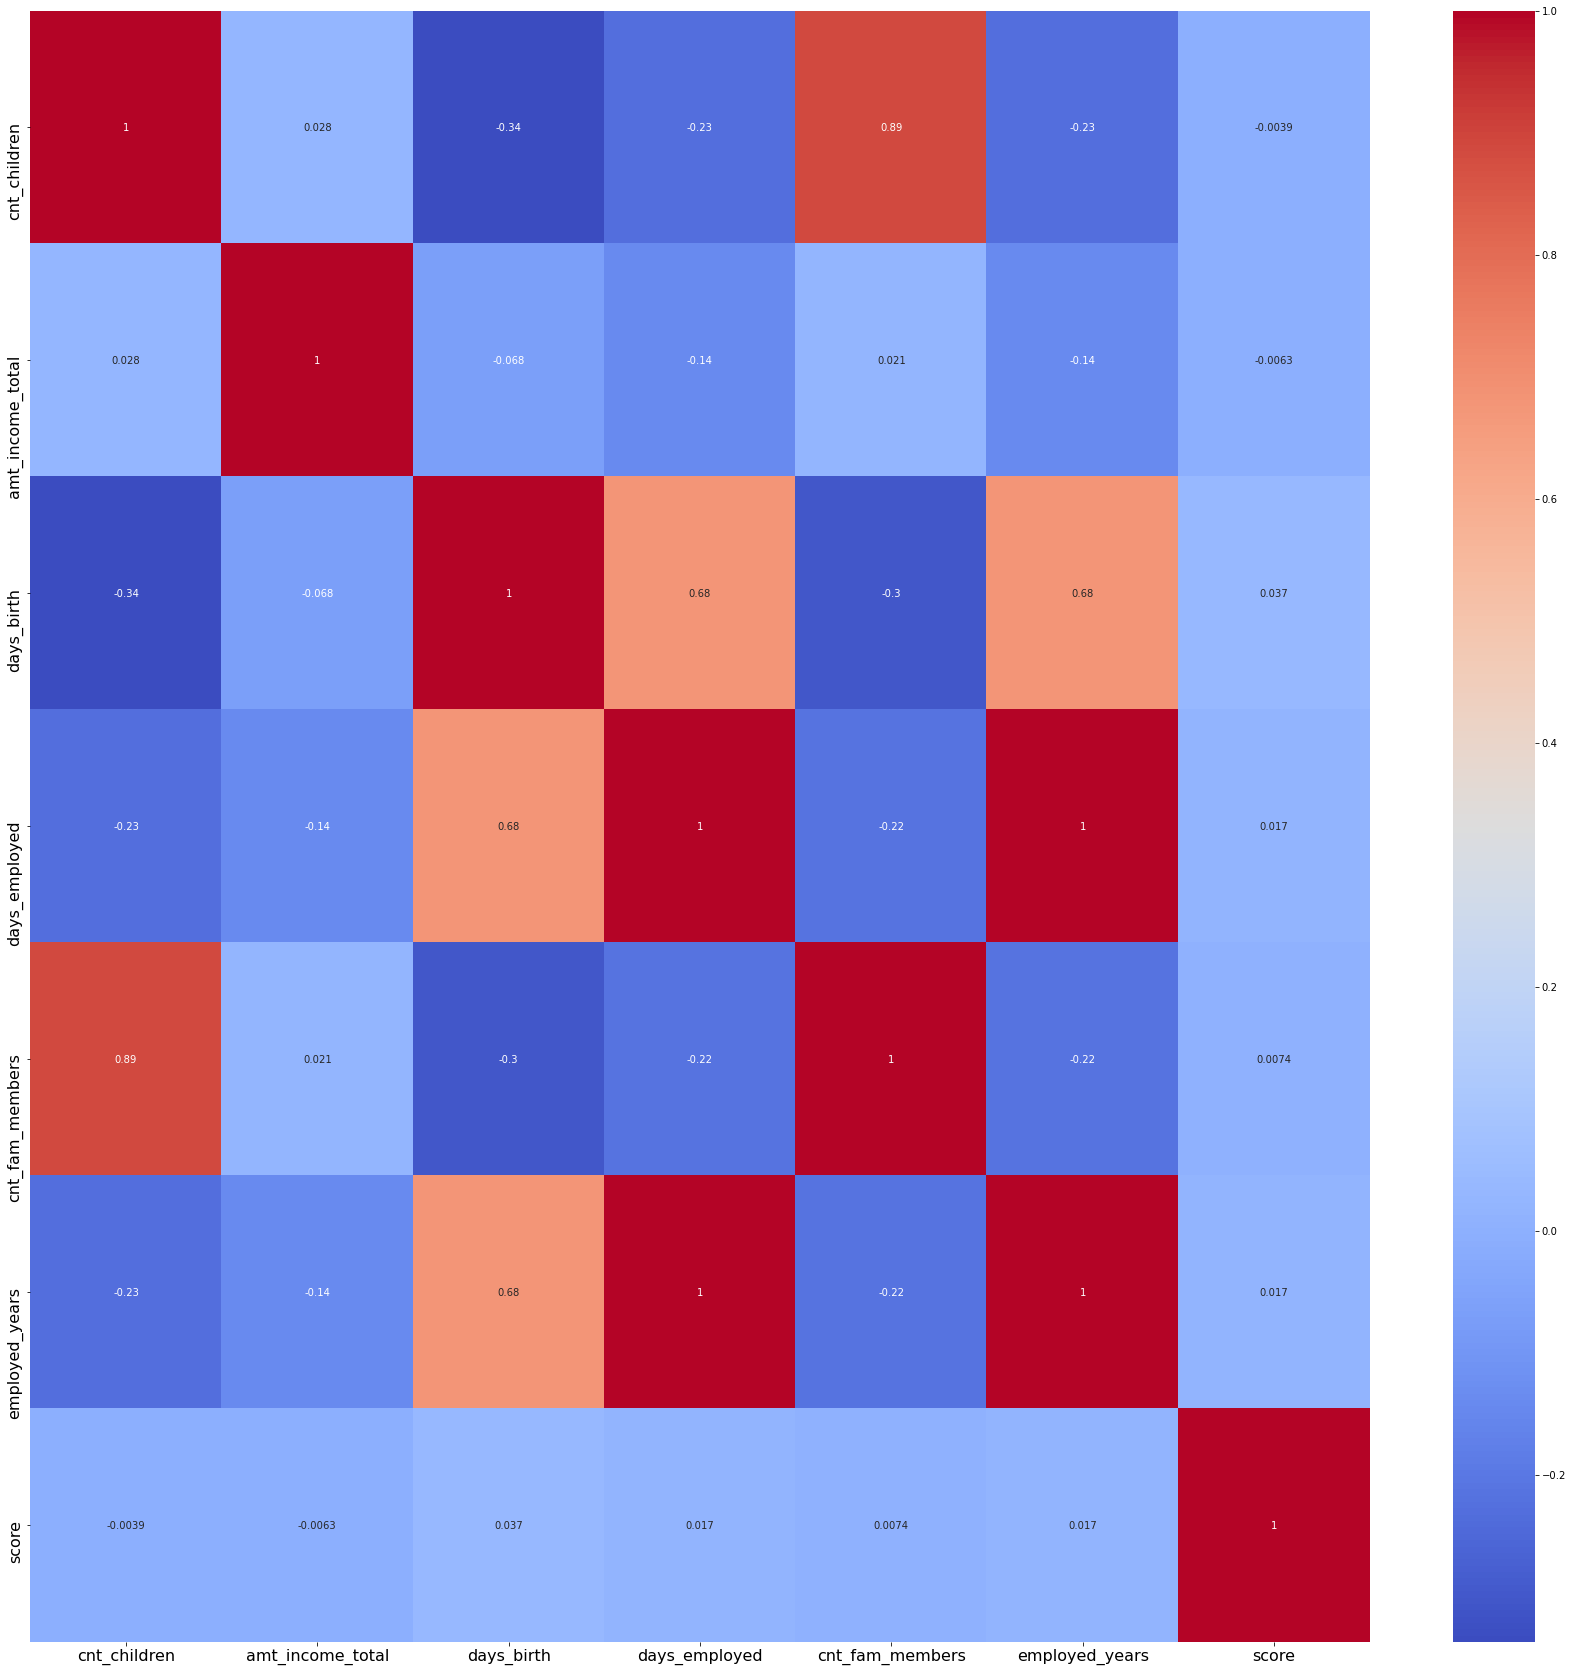

In [7]:
heat = train[['cnt_children','amt_income_total', 'days_birth', 'days_employed', 'cnt_fam_members', 'employed_years', 'score']]

plt.figure(figsize=(30,30))
sns.heatmap(heat.corr(), annot=True, cmap='coolwarm')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

**Adam's code**

In [24]:
import adam_wrangle as wra
import scipy.stats as stats

In [10]:
expanded, score, full_history = wra.get_reports_data('credit_record.csv')

In [11]:
apps = wra.get_application_data('application_record.csv')

In [12]:
apps_cred, apps_none = wra.add_score_target(apps, score)

In [13]:
apps_cred = wra.add_apps_dummies(apps_cred)

In [14]:
train, validate, test = wra.split_data(apps_cred)

# Exploring Gender 

In [15]:
train.code_gender.value_counts()

F    17578
M     8670
Name: code_gender, dtype: int64

Text(0.5, 0, 'Number of Applicants')

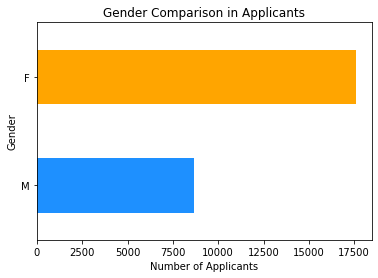

In [16]:
train.code_gender.value_counts().sort_values().plot(kind = 'barh', color = ['dodgerblue', 'orange'])
plt.title('Gender Comparison in Applicants')
plt.ylabel('Gender')
plt.xlabel('Number of Applicants')

In [17]:
# Average score amongst males
train[train.code_gender == 'M'].score.mean()

25.482698961937718

In [18]:
train[train.code_gender == 'M'].score.describe()

count    8670.000000
mean       25.482699
std        31.977172
min       -81.000000
25%         7.000000
50%        24.000000
75%        43.000000
max       308.000000
Name: score, dtype: float64

In [19]:
# Average score amongst females
train[train.code_gender == 'F'].score.mean()

26.2864375924451

In [20]:
train[train.code_gender == 'F'].score.describe()

count    17578.000000
mean        26.286438
std         31.566673
min        -81.000000
25%          7.000000
50%         24.000000
75%         44.000000
max        316.000000
Name: score, dtype: float64

# Is there a relationship between gender and car ownership?

In [21]:
# Average car ownership amongst males
train[train.code_gender == 'M'].flag_own_car.mean()

0.6328719723183391

In [22]:
# Average car ownership amongst females
train[train.code_gender == 'F'].flag_own_car.mean()

0.2590738423028786

Males appear to own cars at a higher rate than females. We can validate this observation with a t-test:

$H_0$: There is no difference in car ownership rates among males and females.  
$H_0$: There is a difference in car ownership rates among males and females.

In [25]:
alpha = 0.05
stat, p = stats.ttest_ind(train[train.code_gender == 'M'].flag_own_car, train[train.code_gender == 'F'].flag_own_car)
stat, p

(62.86030910495491, 0.0)

In [26]:
if p < alpha:
    print('We reject the null hypothesis. Based on t-statistic, males own cars at a higher rate than females.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. Based on t-statistic, males own cars at a higher rate than females.


### Is there a relationship between gender and realty ownership?

In [27]:
# Average home ownership amongst males
train[train.code_gender == 'M'].flag_own_realty.mean()

0.6351787773933103

In [28]:
# Average home ownership amongst females
train[train.code_gender == 'F'].flag_own_realty.mean()

0.6912618045283877

The difference in home ownership is much smaller. Females appear to own realty at a higher rate than males. We can validate this observation with a t-test.

$H_0$: There is no difference in home ownership rates among males and females.  
$H_a$: There is a difference in home ownership rates among males and females.

In [29]:
stat, p = stats.ttest_ind(train[train.code_gender == 'M'].flag_own_realty, train[train.code_gender == 'F'].flag_own_realty)
stat, p

(-9.121731168305445, 7.90870957751874e-20)

In [30]:
if p < alpha:
    print('We reject the null hypothesis. Based on t-statistic, males own realty at a lower rate than females.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. Based on t-statistic, males own realty at a lower rate than females.


### Is there a relationship between gender and the number of children?

In [31]:
# Average number of children amongst males
train[train.code_gender == 'M'].cnt_children.mean()

0.5144175317185697

In [32]:
# Average number of children amongst females
train[train.code_gender == 'F'].cnt_children.mean()

0.3898054386164524

Male applicants appear to have more children than female applicants. We can validate this with a t-test:

$H_0$: There is no difference in the number of children between males and females  
$H_a$: There is a difference in the number of children between males and females

In [33]:
stat, p = stats.ttest_ind(train[train.code_gender == 'M'].cnt_children, train[train.code_gender == 'F'].cnt_children)
stat, p

(12.774463700132197, 2.9405943277508216e-37)

In [34]:
if p < alpha:
    print('We reject the null hypothesis. Based on t-statistic, males have more children than females.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. Based on t-statistic, males have more children than females.


### Is there a relationship between gender and income?

In [35]:
# Average income amongst males
train[train.code_gender == 'M'].amt_income_total.mean()

215281.50778546714

In [36]:
# Average income amongst females
train[train.code_gender == 'F'].amt_income_total.mean()

172342.6243315508

In [37]:
stat, p = stats.ttest_ind(train[train.code_gender == 'M'].amt_income_total, train[train.code_gender == 'F'].amt_income_total)
stat, p

(33.08854247455069, 2.9630620855135665e-235)

In [38]:
if p < alpha:
    print('We reject the null hypothesis. Based on t-statistic, males have more income than females.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. Based on t-statistic, males have more income than females.


### Is there a relationship between gender and income type?

In [39]:
# Create a crosstab of gender and income type
gender_income_type = pd.crosstab(train.code_gender, train.name_income_type)

# Visualize intial crosstab
gender_income_type

name_income_type,Commercial associate,Pensioner,State servant,Student,Working
code_gender,,,,,
F,3993,3748,1575,9,8253
M,2115,673,575,1,5306


In [40]:
# Convert counts to percentages by column
gender_income_type['Commercial associate'] = (gender_income_type['Commercial associate'] / gender_income_type['Commercial associate'].sum() * 100)
gender_income_type['Pensioner'] = (gender_income_type['Pensioner'] / gender_income_type['Pensioner'].sum() * 100)
gender_income_type['State servant'] = (gender_income_type['State servant'] / gender_income_type['State servant'].sum() * 100)
gender_income_type['Student'] = (gender_income_type['Student'] / gender_income_type['Student'].sum() * 100)
gender_income_type['Working'] = (gender_income_type['Working'] / gender_income_type['Working'].sum() * 100)

# Visualize modified crosstab
gender_income_type

name_income_type,Commercial associate,Pensioner,State servant,Student,Working
code_gender,,,,,
F,65.373281,84.7772,73.255814,90.0,60.867321
M,34.626719,15.2228,26.744186,10.0,39.132679


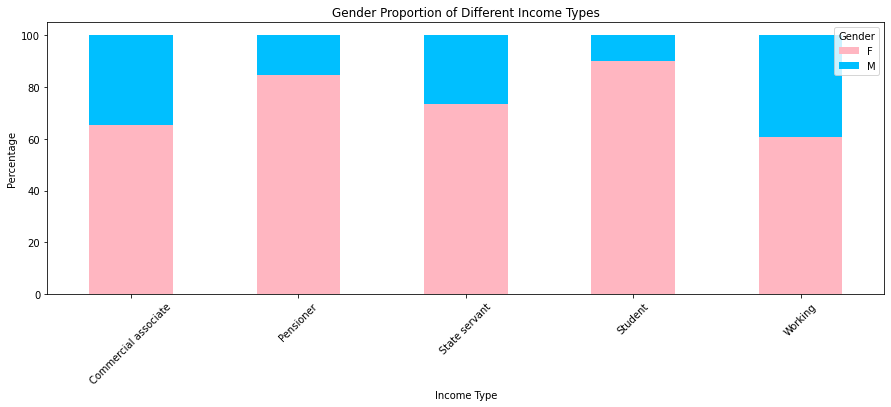

In [41]:
# Visualize percentages as stacked bar for each gender
gender_income_type[['Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working']].T.plot(kind='bar', stacked=True, color = ['lightpink', 'deepskyblue'], figsize=(15,5))

# Add title text
plt.title('Gender Proportion of Different Income Types')

# Add y-axis label
plt.ylabel('Percentage')

# Change orientation of x-tick labels for easier reading
plt.xticks(rotation=45)

# Add x-axis label
plt.xlabel('Income Type')

# Clarify label title
plt.legend(title='Gender')

# Show chart
plt.show()

In [42]:
# Create a crosstab of gender and income type
gender_income_type = pd.crosstab(train.code_gender, train.name_income_type) 

# Create a new column that is the sum of each row
gender_income_type.loc[:,'Total'] = gender_income_type.sum(axis=1) 

# Convert quantities into percentages by row
gender_income_type['Commercial associate'] = (gender_income_type['Commercial associate'] / gender_income_type['Total'] * 100)
gender_income_type['Pensioner'] = (gender_income_type['Pensioner'] / gender_income_type['Total'] * 100)
gender_income_type['State servant'] = (gender_income_type['State servant'] / gender_income_type['Total'] * 100)
gender_income_type['Student'] = (gender_income_type['Student'] / gender_income_type['Total'] * 100)
gender_income_type['Working'] = (gender_income_type['Working'] / gender_income_type['Total'] * 100)

# View the dataframe
gender_income_type

name_income_type,Commercial associate,Pensioner,State servant,Student,Working,Total
code_gender,,,,,,
F,22.715895,21.322107,8.960064,0.051200,46.950734,17578
M,24.394464,7.762399,6.632065,0.011534,61.199539,8670


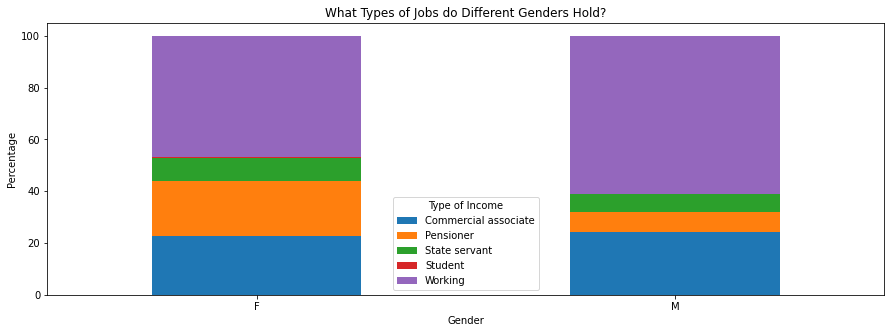

In [43]:
# Visualize percentages as stacked bar for each gender
gender_income_type[['Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working']].plot(kind='bar', stacked=True, figsize=(15,5))

# Add title text
plt.title('What Types of Jobs do Different Genders Hold?')

# Add y-axis label
plt.ylabel('Percentage')

# Change orientation of x-tick labels for easier reading
plt.xticks(rotation=0)

# Add x-axis label
plt.xlabel('Gender')

# Clarify label title
plt.legend(title='Type of Income')

# Show chart
plt.show()

From visual perspective, it appears that women are more often Pensioners than men and men are more often Working than women. We can confirm this with a chi-squared analysis:

In [45]:
gender_income_type_pensioner_working = pd.crosstab(train.code_gender, train.name_income_type)[['Pensioner', 'Working']]
gender_income_type_pensioner_working

name_income_type,Pensioner,Working
code_gender,,
F,3748,8253
M,673,5306
